
Results for 1 neuron:
Training Error: 0.2432
Accuracy: 0.8600
Precision: 0.8750
Sensitivity: 0.8400
Specificity: 0.8800
F1 Score: 0.8571


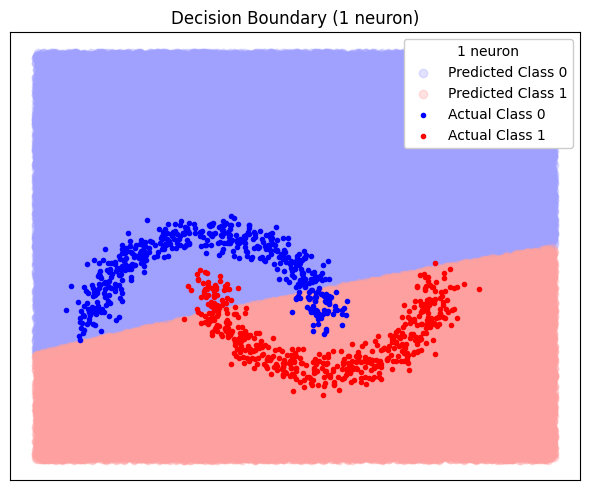


Results for 2 neurons:
Training Error: 0.0369
Accuracy: 0.9500
Precision: 0.9412
Sensitivity: 0.9600
Specificity: 0.9400
F1 Score: 0.9505


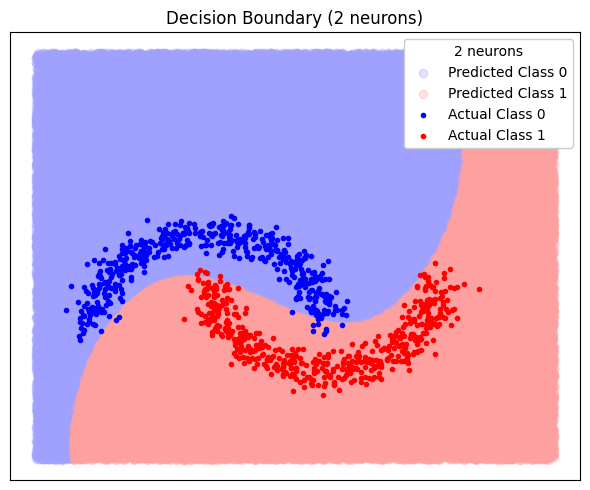


Results for 3 neurons:
Training Error: 0.0370
Accuracy: 0.9500
Precision: 0.9412
Sensitivity: 0.9600
Specificity: 0.9400
F1 Score: 0.9505


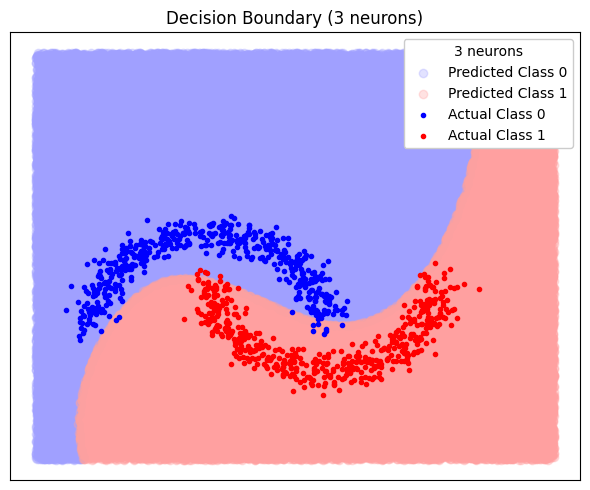


Results for 4 neurons:
Training Error: 0.0001
Accuracy: 0.9900
Precision: 1.0000
Sensitivity: 0.9800
Specificity: 1.0000
F1 Score: 0.9899


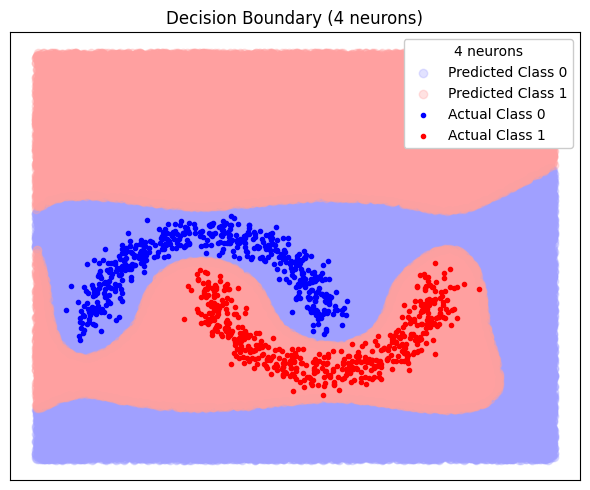


Results for 5 neurons:
Training Error: 0.0000
Accuracy: 1.0000
Precision: 1.0000
Sensitivity: 1.0000
Specificity: 1.0000
F1 Score: 1.0000


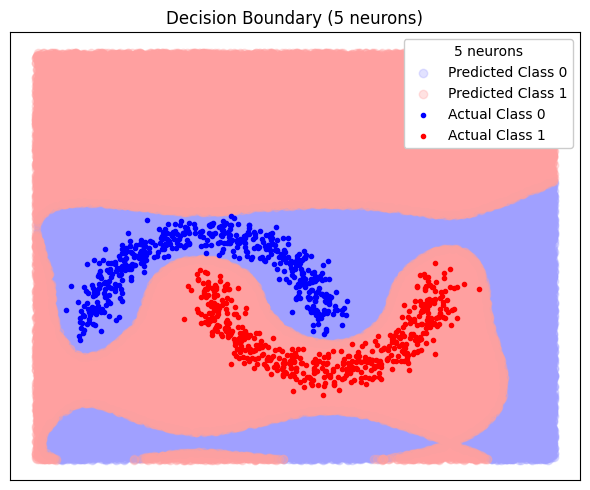


Results for 6 neurons:
Training Error: 0.0000
Accuracy: 1.0000
Precision: 1.0000
Sensitivity: 1.0000
Specificity: 1.0000
F1 Score: 1.0000


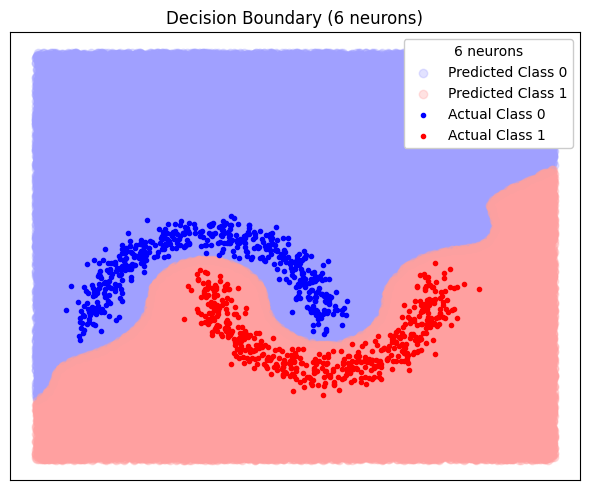

In [1]:
"""
SQQNN Binary Classifier for Moon Dataset
This script evaluates a quantum-inspired binary classifier on the make_moons dataset,
testing different numbers of neurons and visualizing decision boundaries.
"""

from QBCNetwork import *
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn import metrics
from sklearn.datasets import make_moons

# Configuration parameters
TRAIN_SAMPLES = 1000
VAL_SAMPLES = 10
TEST_SAMPLES = 100
NOISE_LEVEL = 0.1
RANDOM_SEED = 42
REPETITIONS = 1
MAX_NEURONS = 6
SCALE_FACTOR = 1e-16
DECISION_POINTS = 100000  # Points for decision boundary visualization

# Generate moon-shaped datasets
xt, yt = make_moons(n_samples=TRAIN_SAMPLES, noise=NOISE_LEVEL, random_state=RANDOM_SEED)
xv, yv = make_moons(n_samples=VAL_SAMPLES, noise=NOISE_LEVEL, random_state=RANDOM_SEED)
xtt, ytt = make_moons(n_samples=TEST_SAMPLES, noise=NOISE_LEVEL, random_state=RANDOM_SEED)

# Set up colormap for visualization
colormap = plt.cm.bwr 
class_colors = colormap(np.linspace(0, 1, 20))  # Generate colors for classes

# Define activation types for quantum network (all linear)
activation_types = np.array([ATIVATION_TYPE.LINEAR]*5)

# Prepare grid for decision boundary visualization
data_min = np.min(xt) * 0.9
data_max = np.max(xt) * 1.1
xi = np.random.rand(DECISION_POINTS, 2) * (data_max - data_min) + data_min

for repetition in range(REPETITIONS):
    # Generate new dataset for this repetition
    xt, yt = make_moons(n_samples=TRAIN_SAMPLES, noise=NOISE_LEVEL)
    xv, yv = make_moons(n_samples=VAL_SAMPLES, noise=NOISE_LEVEL)
    xtt, ytt = make_moons(n_samples=TEST_SAMPLES, noise=NOISE_LEVEL)
    
    # Scale and shift data
    xt = 0.8 * xt + 0.1
    xv = 0.8 * xv + 0.1
    xtt = 0.8 * xtt + 0.1

    for neuron_count in range(1, MAX_NEURONS + 1):
        # Initialize and train quantum binary classifier
        qrn = QBCNetwork(xt, yt, xv, yv, neuron_count)
        training_error = qrn.fit_regression(SCALE_FACTOR)
        
        # Make predictions
        y_pred = qrn.predict_labels(xtt)
        decision_boundary = qrn.predict_labels(xi)
        
        # Calculate performance metrics
        accuracy = metrics.accuracy_score(ytt, y_pred)
        precision = metrics.precision_score(ytt, y_pred)
        sensitivity = metrics.recall_score(ytt, y_pred)
        specificity = metrics.recall_score(ytt, y_pred, pos_label=0)
        f1_score = metrics.f1_score(ytt, y_pred)
        
        # Print performance metrics
        print(f"\nResults for {neuron_count} neuron{'s' if neuron_count > 1 else ''}:")
        print(f"Training Error: {training_error:.4f}")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Sensitivity: {sensitivity:.4f}")
        print(f"Specificity: {specificity:.4f}")
        print(f"F1 Score: {f1_score:.4f}")
        
        # Separate points for decision boundary visualization
        class1_indices = [i for i, val in enumerate(decision_boundary) if val < 0.5]
        class2_indices = [i for i, val in enumerate(decision_boundary) if val >= 0.5]
        
        # Create visualization
        plt.figure(figsize=(6, 5))
        
        # Plot decision boundary
        plt.scatter(xi[class1_indices, 0], xi[class1_indices, 1], 
                   color=class_colors[6], marker='o', 
                   label='Predicted Class 0', alpha=0.3)
        plt.scatter(xi[class2_indices, 0], xi[class2_indices, 1], 
                   color=class_colors[13], marker='o', 
                   label='Predicted Class 1', alpha=0.3)
        
        # Plot training points
        class0_train = [i for i, val in enumerate(yt) if val < 0.5]
        class1_train = [i for i, val in enumerate(yt) if val >= 0.5]
        
        plt.scatter(xt[class0_train, 0], xt[class0_train, 1], 
                   color='blue', marker='.', label='Actual Class 0')
        plt.scatter(xt[class1_train, 0], xt[class1_train, 1], 
                   color='red', marker='.', label='Actual Class 1')
        
        # Configure plot
        title = f"{neuron_count} neuron{'s' if neuron_count > 1 else ''}"
        plt.legend(fontsize=10, loc='upper right', title=title,
                  facecolor='white', framealpha=1, title_fontsize=10)
        plt.title(f"Decision Boundary ({title})", fontsize=12)
        plt.tick_params(axis='both', which='both', 
                       bottom=False, top=False, 
                       left=False, right=False, 
                       labelbottom=False, labelleft=False)
        
        plt.tight_layout()
        # plt.savefig(f"decision_boundary_{neuron_count}_neurons.png", dpi=300)
        plt.show()